# Cross validation


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Rozważmy następujący zbiór punktów:

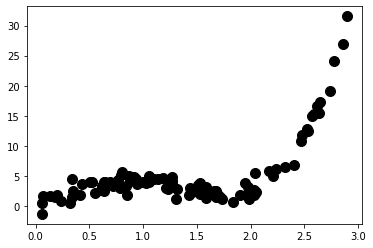

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.9).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i oceń wyniki na części testowej.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [4]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [5]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([ 0.68681589,  3.93047031,  1.22292741,  1.559039  ,  7.09460473,
        5.67004494,  2.01012868,  1.82981942,  0.49912113, 18.57210105,
        3.10297634,  3.95080774,  1.79400381,  2.18495485,  1.3619525 ,
       14.18333213,  7.0620339 ,  2.48086653,  7.04996296, 13.28196708,
        0.44990616, 13.14322132,  1.09489924,  1.67301252, 15.04191597,
        0.42919649,  9.27811172,  0.58126415,  0.72807552,  1.61971727,
        0.6615605 , 12.02879119,  1.65746697,  2.37032046,  0.53779929,
        0.89910416,  1.01315488,  0.57439061,  3.27281748, 15.43390184])

In [6]:
from sklearn import  metrics
print("R^2: {}".format(metrics.r2_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

R^2: 0.45686922593759693
Explained variance score: 0.4648522921518802
Median absolute error: 2.2744826579896853
Mean squared error: 9.920213629829965
Mean absolute errors: 2.5576048510793865


# Zadanie
Wylicz powyższe miary dla wszytkich modeli:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [ ]:
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression()) ))
models.append(('PR25', make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression()) ))

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))

In [7]:
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression()) ))
models.append(('PR25', make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression()) ))

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))

LR
R^2: 0.429000566620218
Explained variance score: 0.5545908919387523
Median absolute error: 2.707820955043056
Mean squared error: 10.4292311026156
Mean absolute errors: 2.880708962682566
PR2
R^2: 0.45686922593759693
Explained variance score: 0.4648522921518802
Median absolute error: 2.2744826579896853
Mean squared error: 9.920213629829965
Mean absolute errors: 2.5576048510793865
PR3
R^2: 0.9012233352679269
Explained variance score: 0.9018934042858758
Median absolute error: 0.5794005357029031
Mean squared error: 1.80414305831927
Mean absolute errors: 0.9830412502926602
PR4
R^2: 0.9400986784571864
Explained variance score: 0.9409019978060534
Median absolute error: 0.7795040961916848
Mean squared error: 1.0940899223389835
Mean absolute errors: 0.8721509847870994
PR5
R^2: 0.9348957347244655
Explained variance score: 0.9349491741383852
Median absolute error: 0.6525757750690371
Mean squared error: 1.1891210194475512
Mean absolute errors: 0.8496504927508267
PR6
R^2: 0.9216074981562665
Expla

In [9]:
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression()) ))
models.append(('PR25', make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression()) ))

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_true=y_test, y_pred=model.predict(X_test)) ))

LR
Mean absolute errors: 4.508908789677544
PR2
Mean absolute errors: 3.8802846013951653
PR3
Mean absolute errors: 0.821271049406155
PR4
Mean absolute errors: 0.6917732282887726
PR5
Mean absolute errors: 0.7236875600324902
PR6
Mean absolute errors: 0.6741340817312362
PR25
Mean absolute errors: 1.0056404219737967
